In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/halcyon/ProgramFiles/anaconda3/envs/ngsim/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load data

In [3]:
trainloader=DataLoader(
    torchvision.datasets.MNIST('mnist_data', train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
        batch_size=512,shuffle=True)
testloader=DataLoader(
    torchvision.datasets.MNIST('mnist_data/', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=512, shuffle=False)

<class 'torch.Tensor'>
torch.float32 torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


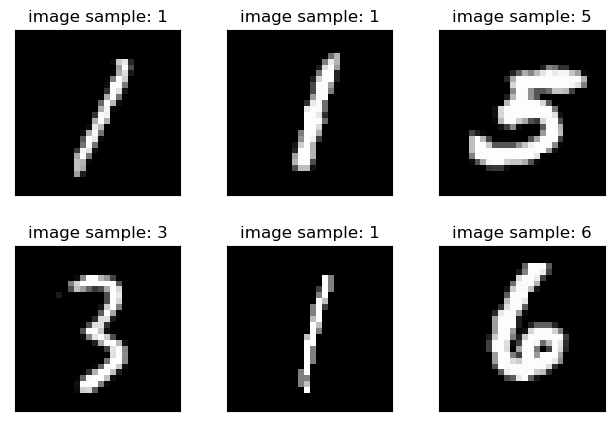

In [10]:
x,y=next(iter(trainloader))
print(type(x))
# x,y=trainloader
print(x.dtype,x.shape, y.shape, x.min(), x.max())

def plot_image(img,label,name):
    fig=plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(img[i][0]*0.3081+0.1307, cmap='gray', interpolation='none')
        plt.title("{}: {}".format(name, label[i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_image(x, y, 'image sample')

train

In [11]:
# nn
class NN(nn.Module):
    def __init__(self):
        super(NN,self).__init__()# xw+b
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # x: [b, 1, 28, 28]
        # h1 = relu(xw1+b1)
        x = nn.ReLU(self.fc1(x))
        # h2 = relu(h1w2+b2)
        x = nn.ReLU(self.fc2(x))
        # h3 = h2w3+b3
        x = self.fc3(x)

        return x


In [ ]:
def one_hot(label, depth=10):
    out=torch.zeros(label.size(0),depth)
    idx=torch.Long




model=NN()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-3,momentum=0.9)
loss=[]
for epoch in range(3):
    for batch_idx, (x, y) in enumerate(train_loader):
        
        x = x.view(x.size(0), 28*28)
        pred=NN(x)
        y=one_hot(y)


test

In [15]:
print(50<<4)

800
